In [1]:
import heapq

import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sklearn_evaluation
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import SVC

!pip install numpy scipy scikit-learn matplotlib pandas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA

import heapq

You should consider upgrading via the '/Users/engineer/workspace/cse590-machine-learning/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
X_train = pd.read_csv("./dataset/X_train.csv").values
y_train = pd.read_csv("./dataset/y_train.csv").values.ravel()
X_test = pd.read_csv("./dataset/X_test.csv").values
y_test = pd.read_csv("./dataset/y_test.csv").values.ravel()

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=256)
mlp.fit(X_train_standard, y_train)
mlp_predictions = mlp.predict_proba(X_test_standard)
print(len(mlp_predictions))


4999


In [23]:
svm = SVC(kernel='poly', C=10, degree=3, probability=True)
svm.fit(X_train_minmax, y_train)
svm_predictions = svm.predict_proba(X_test_minmax)
print(len(svm_predictions))


4999


In [24]:
pred_prob_class_1_svm = svm_predictions[:, 0]
pred_prob_class_2_svm = svm_predictions[:, 1]
pred_prob_class_3_svm = svm_predictions[:, 2]
pred_prob_class_4_svm = svm_predictions[:, 3]
pred_prob_class_5_svm = svm_predictions[:, 4]

pred_prob_class_1_mlp = mlp_predictions[:, 0]
pred_prob_class_2_mlp = mlp_predictions[:, 1]
pred_prob_class_3_mlp = mlp_predictions[:, 2]
pred_prob_class_4_mlp = mlp_predictions[:, 3]
pred_prob_class_5_mlp = mlp_predictions[:, 4]

In [21]:
print(mlp_predictions[0])
print(mlp_predictions[1])
print(mlp_predictions[4998])

[9.99898618e-01 7.53150988e-05 1.27823787e-06 2.47859314e-05
 2.88439511e-09]
[1.00000000e+00 1.52682653e-13 3.69123696e-11 1.44272817e-10
 2.48829521e-13]
[4.12566979e-12 8.46277786e-09 1.02614001e-01 1.55710178e-09
 8.97385989e-01]


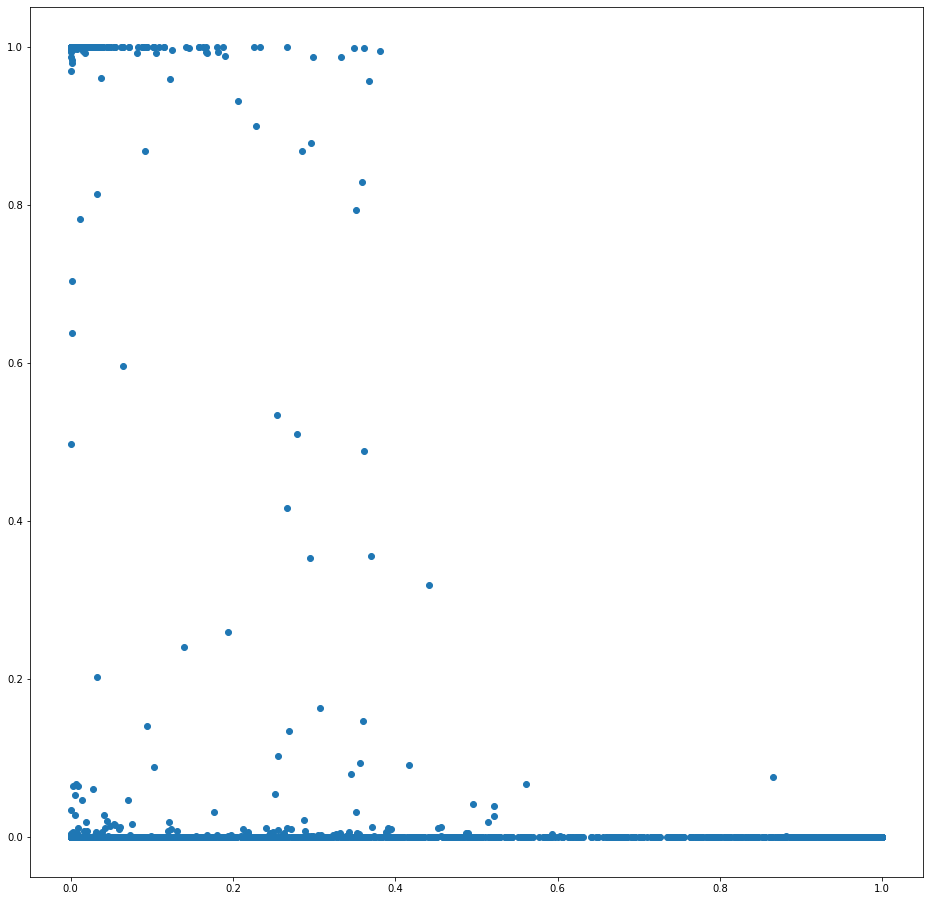

In [26]:
fig, ax = plt.subplots()
fig.set_figheight(16)
fig.set_figwidth(16)
plt.scatter(pred_prob_class_1_svm, pred_prob_class_2_mlp)

In [ ]:
# get the class probabilities
# where those probabilities over 50% correctly classified? like what if the 90% predictions where incorrect
# run a test to see how many that is before you try to graph it